In [1]:
from mxlbricks import get_saadat2021, get_matuszynska2016npq
from model_validation import create_report_summary
import mxlbricks.names as n
from mxlpy import units

In [1]:
from model_validation import calc_co2_conc, mM_to_μmol_per_m2

x = calc_co2_conc(400)

print(f"400 µbar CO2 is {x} mM")

400 µbar CO2 is 0.0136 mM


          Fluo     PAR  rel. Fluo
Time                             
0.0     0.0475    40.0   0.200169
0.8     0.2373  5000.0   1.000000
73.0    0.0721   903.0   0.303835
73.8    0.0730  5000.0   0.307627
134.0   0.0578   903.0   0.243574
134.8   0.0588  5000.0   0.247788
195.0   0.0529   903.0   0.222925
195.8   0.0549  5000.0   0.231353
256.0   0.0515   903.0   0.217025
256.8   0.0525  5000.0   0.221239
317.0   0.0495   903.0   0.208597
317.8   0.0510  5000.0   0.214918
378.0   0.0446   903.0   0.187948
378.8   0.0505  5000.0   0.212811
439.0   0.0500   903.0   0.210704
439.8   0.0510  5000.0   0.214918
500.0   0.0505   903.0   0.212811
500.8   0.0520  5000.0   0.219132
561.0   0.0515   903.0   0.217025
561.8   0.0525  5000.0   0.221239
622.0   0.0520   903.0   0.219132
622.8   0.0534  5000.0   0.225032
683.0   0.0569    90.0   0.239781
683.8   0.0868  5000.0   0.365782
744.0   0.0559    90.0   0.235567
744.8   0.1069  5000.0   0.450485
805.0   0.0549    90.0   0.231353
805.8   0.1088

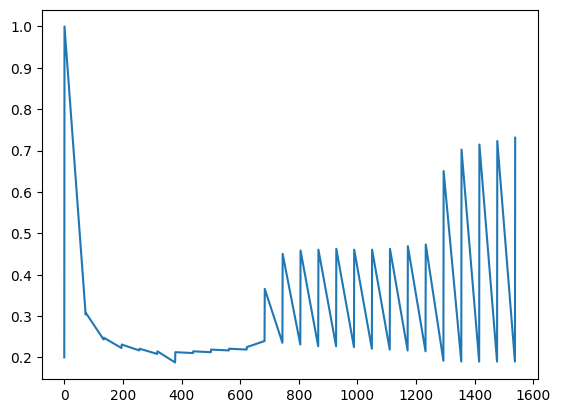

In [2]:
from model_validation import create_pamfit


create_pamfit(pfd=n.pfd(), model=get_saadat2021(), parameter_to_fit=["gamma0", "gamma1", "gamma2", "gamma3", "kZSat"])

# Validating two mxlbrick models

## Saadat2021

In [ ]:
m = get_saadat2021()

m.update_reaction(n.rubisco_carboxylase(), unit=units.mmol / (units.liter * units.second)) # Add Vc unit mM/s
;

''

In [3]:
m.get_raw_reactions().keys()

dict_keys(['ferredoxin_thioredoxin_reductase', 'tr_activation', 'tr_inactivation', 'atp_synthase', 'b6f', 'lhc_protonation', 'lhc_deprotonation', 'cyclic_electron_flow', 'violaxanthin_deepoxidase', 'zeaxanthin_epoxidase', 'fnr', 'ndh', 'PSII', 'PSI', 'mehler', 'ferredoxin_reductase', 'proton_leak', 'PTOX', 'lhc_state_transition_12', 'lhc_state_transition_21', 'rubisco_carboxylase', 'phosphoglycerate_kinase', 'gadph', 'triose_phosphate_isomerase', 'aldolase_dhap_gap', 'aldolase_dhap_e4p', 'fbpase', 'transketolase_gap_f6p', 'transketolase_gap_s7p', 'SBPase', 'ribose_phosphate_isomerase', 'ribulose_phosphate_epimerase', 'phosphoribulokinase', 'g6pi', 'phosphoglucomutase', 'ex_pga', 'ex_gap', 'ex_dhap', 'ex_g1p', 'mda_reductase_1', 'mda_reductase_2', 'ascorbate_peroxidase', 'glutathion_reductase', 'dehydroascorbate_reductase', 'ex_atp', 'ex_nadph'])

In [4]:
m.get_raw_reactions()["PSI"]

Reaction(fn=<function _rate_ps1 at 0x78a64cb749a0>, stoichiometry={'Plastocyanine (oxidised)': 1}, args=['A0', 'PSII_cross_section', 'PPFD'], unit=None)

(<Figure size 1000x500 with 4 Axes>,
 (<Axes: title={'center': 'Variables'}>, <Axes: title={'center': 'Fluxes'}>))

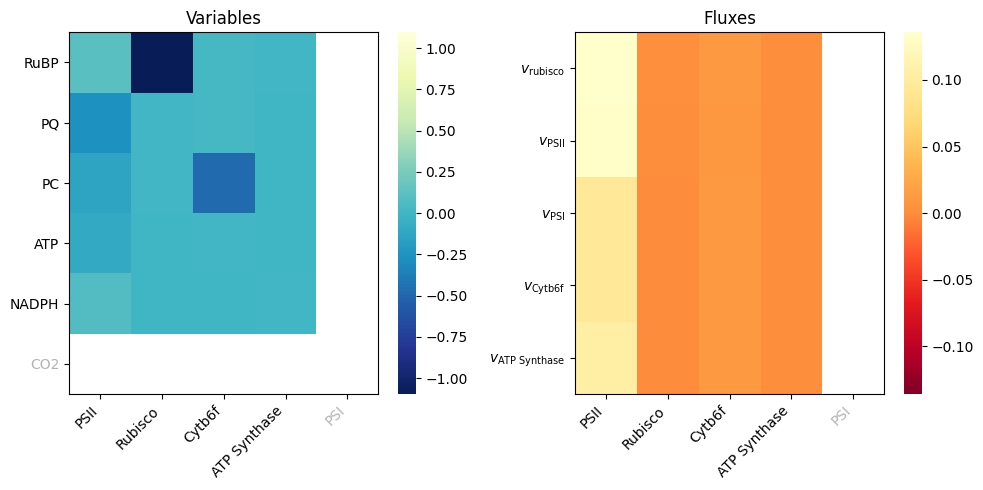

In [5]:
from model_validation import create_mca_fig

create_mca_fig(
    model=m,
    coeff_rubisco=n.kcat(n.rubisco_carboxylase()),
    coeff_psii="k2",
    coeff_psi=None,
    coeff_cytb6f=n.kcat(n.b6f()),
    coeff_atp_synthase=n.kf(n.atp_synthase()),
    rubp=n.rubp(),
    co2=n.co2(),
    pq=n.pq_ox(),
    pc=n.pc_ox(),
    atp=n.atp(),
    nadph=n.nadph(),
    v_rubisco=n.rubisco_carboxylase(),
    v_psii="PSII",
    v_psi="PSI",
    v_cytb6f=n.b6f(),
    v_atp_synthase=n.atp_synthase(),
)

In [ ]:

create_report_summary(
    model=m,
    pfd=n.pfd(),
    co2=n.co2(),
    vc=n.rubisco_carboxylase(),
    file_prepend="saadat2021",
    flourescence=n.fluorescence(),
    atp=n.atp(),
    nadph=n.nadph(),
    rubp=n.rubp(),
    coeff_rubisco=n.kcat(n.rubisco_carboxylase())
);

## Matuzynska2016

In [3]:
# TODO: Finish adding args
# MCA does not work because I have not given enough coefficients yet
# TODO: Fix Fmin in Matuszynska2016NPQ model
create_report_summary(
    model=get_matuszynska2016npq(),
    pfd=n.pfd(),
    file_prepend="matuszynska2016npq",
    flourescence=n.fluorescence(),
    atp=n.atp(),
    coeff_psii="k2"
);

INFO:root:Downloading 1 NEON DP1.00024.001 files totaling approximately 16.6 MB.


ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x7a3ff55037e0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 640x480 with 2 Axes>